In [8]:
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
LOG_DIR = Path("logs/runs/exp3")

PATTERNS = {
    "wall": re.compile(r"CORE::TIME::WALL\s+([0-9.]+)"),
    "scatter": re.compile(r"CORE::TIME::SCATTER\s+([0-9.]+)"),
    "gather": re.compile(r"CORE::TIME::GATHER\s+([0-9.]+)"),
    "phases": re.compile(r"CORE::PHASES\s+([0-9]+)"),
    "edges_streamed": re.compile(r"CORE::BYTES::EDGES_STREAMED\s+([0-9]+)"),
    "updates_in": re.compile(r"CORE::BYTES::UPDATES_IN\s+([0-9]+)"),
    "updates_out": re.compile(r"CORE::BYTES::UPDATES_OUT\s+([0-9]+)")
}

def parse_log(path: Path) -> dict:
    text = path.read_text()
    out = {"log": path.name}
    for key, pat in PATTERNS.items():
        m = pat.findall(text)
        if not m:
            out[key] = None
        else:
            out[key] = sum(float(x) for x in m)
    return out


In [ ]:
# graph = "cit-Patents"
INPUT_GRAPH = "rmat*"
ALGORITHM = "*"
RUN_ID = "*"

PATTERN = f"{INPUT_GRAPH}-{ALGORITHM}-{RUN_ID}.log"
# PATTERN = f"soc-LiveJournal1-*k32-r0.log"

logs = sorted(LOG_DIR.glob(PATTERN))
records = [parse_log(p) for p in logs]
df = pd.DataFrame(records)

EDGE_REC_BYTES = 12  # type=1 COMPACT (@IIf)
UPDATE_REC_BYTES = 8

df["# iters"] = df["phases"].astype("Int64")

df["streaming_time"] = df["scatter"] + df["gather"]
df["ratio"] = df["wall"] / df["streaming_time"]

df["edges_streamed_cnt"] = df["edges_streamed"] / EDGE_REC_BYTES
df["updates_out_cnt"] = df["updates_out"] / UPDATE_REC_BYTES
df["wasted %"] = 100 * (1 - (df["updates_out_cnt"] / df["edges_streamed_cnt"]))

df

,log,wall,scatter,gather,phases,edges_streamed,updates_in,updates_out,# iters,streaming_time,ratio,edges_streamed_cnt,updates_out_cnt,wasted %
0,rmat_s22_e67-pagerank-th1-mem8g-r0.log,20.34660,8.51201,7.590100,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,16.102110,1.263598,1.476395e+09,1.409286e+09,4.545455
1,rmat_s22_e67-pagerank-th1-mem8g-r1.log,22.32190,10.04770,7.863760,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,17.911460,1.246236,1.476395e+09,1.409286e+09,4.545455
2,rmat_s22_e67-pagerank-th1-mem8g-r2.log,20.77310,8.52412,7.836970,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,16.361090,1.269665,1.476395e+09,1.409286e+09,4.545455
3,rmat_s22_e67-pagerank-th16-mem8g-r0.log,18.94430,8.82501,5.289000,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,14.114010,1.342234,1.476395e+09,1.409286e+09,4.545455
4,rmat_s22_e67-pagerank-th16-mem8g-r1.log,20.37020,9.64301,5.639690,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,15.282700,1.332893,1.476395e+09,1.409286e+09,4.545455
5,rmat_s22_e67-pagerank-th16-mem8g-r2.log,25.07400,13.65490,6.026730,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,19.681630,1.273980,1.476395e+09,1.409286e+09,4.545455
6,rmat_s22_e67-pagerank-th2-mem8g-r0.log,14.67700,6.16177,4.577700,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.739470,1.366641,1.476395e+09,1.409286e+09,4.545455
7,rmat_s22_e67-pagerank-th2-mem8g-r1.log,14.81460,6.19055,4.609160,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.799710,1.371759,1.476395e+09,1.409286e+09,4.545455
8,rmat_s22_e67-pagerank-th2-mem8g-r2.log,14.91880,6.21064,4.674860,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.885500,1.370520,1.476395e+09,1.409286e+09,4.545455
9,rmat_s22_e67-pagerank-th4-mem8g-r0.log,12.28460,4.96378,3.565020,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,8.528800,1.440367,1.476395e+09,1.409286e+09,4.545455


In [11]:
df.to_csv("tmp.csv", index=False)

In [12]:
# Experiment 2

# df.sort_values(by=["wall"])

In [ ]:
# Experiment 3
pattern = (
    r"-"                             # dash before algorithm
    r"(?P<algorithm>[a-zA-Z0-9_]+)"  # algorithm name
    r"-th(?P<threads>\d+)"           # threads
    r"-mem(?P<memory>\d+[a-zA-Z])"   # memory (e.g. 1g, 8g)
    r"-r(?P<run>\d+)"                # run id
)

df[["algorithm", "threads", "memory", "run"]] = (
    df["log"]
    .str.extract(pattern)
)

def mem_to_mb(s: str) -> int:
    s = s.lower()
    if s.endswith("g"):
        return int(s[:-1]) * 1024
    if s.endswith("m"):
        return int(s[:-1])
    raise ValueError(f"Unknown memory format: {s}")

df["memory"] = df["memory"].apply(mem_to_mb)

df["threads"] = df["threads"].astype(int)

front = ["algorithm", "memory", "threads", "run", "wall"]
df = df[front + [c for c in df.columns if c not in front]]

df.sort_values(by=["algorithm", "memory", "threads"])

,algorithm,memory,threads,run,wall,log,scatter,gather,phases,edges_streamed,updates_in,updates_out,# iters,streaming_time,ratio,edges_streamed_cnt,updates_out_cnt,wasted %
0,pagerank,8192,1,0,20.34660,rmat_s22_e67-pagerank-th1-mem8g-r0.log,8.51201,7.590100,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,16.102110,1.263598,1.476395e+09,1.409286e+09,4.545455
1,pagerank,8192,1,1,22.32190,rmat_s22_e67-pagerank-th1-mem8g-r1.log,10.04770,7.863760,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,17.911460,1.246236,1.476395e+09,1.409286e+09,4.545455
2,pagerank,8192,1,2,20.77310,rmat_s22_e67-pagerank-th1-mem8g-r2.log,8.52412,7.836970,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,16.361090,1.269665,1.476395e+09,1.409286e+09,4.545455
6,pagerank,8192,2,0,14.67700,rmat_s22_e67-pagerank-th2-mem8g-r0.log,6.16177,4.577700,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.739470,1.366641,1.476395e+09,1.409286e+09,4.545455
7,pagerank,8192,2,1,14.81460,rmat_s22_e67-pagerank-th2-mem8g-r1.log,6.19055,4.609160,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.799710,1.371759,1.476395e+09,1.409286e+09,4.545455
8,pagerank,8192,2,2,14.91880,rmat_s22_e67-pagerank-th2-mem8g-r2.log,6.21064,4.674860,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,10.885500,1.370520,1.476395e+09,1.409286e+09,4.545455
9,pagerank,8192,4,0,12.28460,rmat_s22_e67-pagerank-th4-mem8g-r0.log,4.96378,3.565020,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,8.528800,1.440367,1.476395e+09,1.409286e+09,4.545455
10,pagerank,8192,4,1,12.41120,rmat_s22_e67-pagerank-th4-mem8g-r1.log,5.08601,3.569180,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,8.655190,1.433960,1.476395e+09,1.409286e+09,4.545455
11,pagerank,8192,4,2,12.63550,rmat_s22_e67-pagerank-th4-mem8g-r2.log,5.16528,3.605850,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,8.771130,1.440578,1.476395e+09,1.409286e+09,4.545455
12,pagerank,8192,8,0,14.21120,rmat_s22_e67-pagerank-th8-mem8g-r0.log,5.77982,4.010360,22.0,1.771674e+10,1.073742e+10,1.127429e+10,22,9.790180,1.451577,1.476395e+09,1.409286e+09,4.545455


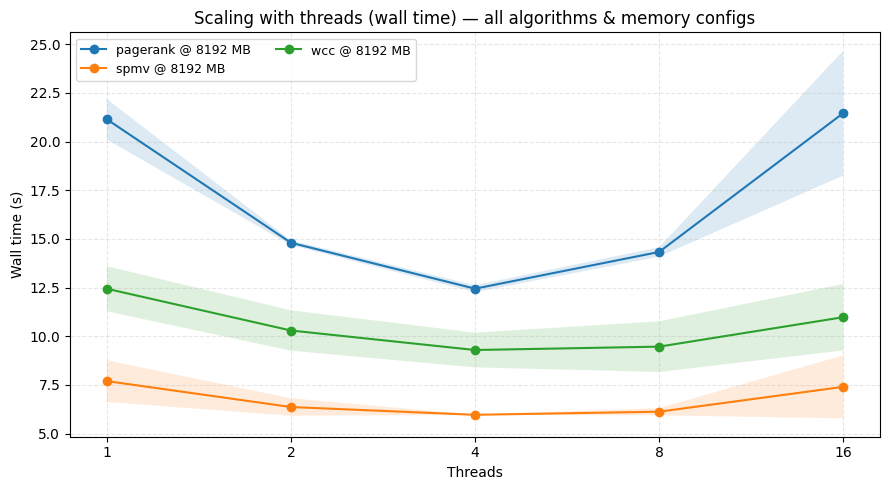

In [ ]:
df = df.sort_values(["algorithm", "memory", "threads", "run"])

agg = (df.groupby(["algorithm", "memory", "threads"], as_index=False)
         .agg(wall_mean=("wall", "mean"),
              wall_std=("wall", "std"),
              n=("wall", "size")))

plt.figure(figsize=(9, 5))

for (alg, mem), sub in agg.groupby(["algorithm", "memory"]):
    sub = sub.sort_values("threads")
    label = f"{alg} @ {mem} MB"
    plt.plot(sub["threads"], sub["wall_mean"], marker="o", label=label)

    # Shaded +/- 1 std with multiple runs
    if sub["wall_std"].notna().any() and (sub["n"] > 1).any():
        plt.fill_between(
            sub["threads"],
            sub["wall_mean"] - sub["wall_std"],
            sub["wall_mean"] + sub["wall_std"],
            alpha=0.15
        )

plt.xscale("log", base=2)
plt.xticks(sorted(df["threads"].unique()), sorted(df["threads"].unique()))
plt.xlabel("Threads")
plt.ylabel("Wall time (s)")
plt.title("Scaling with threads (wall time) — all algorithms & memory configs")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()